In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import pandas as pd
df_i=pd.read_csv("images.csv", header=None)
print(len(df_i))
df_i.head()

3200


,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [3]:
df_l=pd.read_csv("labels.csv", header=None, names=["squiggle", "narrowband", "narrowbanddrd","noise"])
df_l.head()

,squiggle,narrowband,narrowbanddrd,noise
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [4]:
df_test_i=pd.read_csv("images (1).csv", header=None)
df_test_l=pd.read_csv("labels (1).csv", header=None, names=["squiggle", "narrowband", "narrowbanddrd","noise"])

In [5]:
df_i.shape, df_l.shape

((3200, 8192), (3200, 4))

In [6]:
df_test_i.shape, df_test_l.shape

((800, 8192), (800, 4))

In [7]:
x_train=df_i.values.reshape(3200,64,128,1)
x_test=df_test_i.values.reshape(800,64,128,1)
y_train=df_l.values
y_test=df_test_l.values

In [8]:
len(y_train)

3200

In [9]:
np.sum(np.isnan(y_train))

0

In [10]:
train_datagen=ImageDataGenerator(horizontal_flip=True)

In [11]:
m=Sequential()
m.add(Conv2D(filters=32,kernel_size=5,activation="relu",padding="same", input_shape=(64,128,1)))
m.add(BatchNormalization())
m.add(MaxPooling2D((2,2)))
m.add(Dropout(0.2))
m.add(Flatten())
m.add(Dense(512, activation="relu"))
m.add(BatchNormalization())
m.add(Dropout(0.2))
m.add(Dense(128, activation="relu"))
m.add(BatchNormalization())
m.add(Dropout(0.2))
m.add(Dense(4, activation="softmax"))

In [12]:
m.compile(optimizer="adam",
          loss="categorical_crossentropy",
          metrics=["accuracy"])
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 32)       832       
                                                                 
 batch_normalization (BatchN  (None, 64, 128, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 64, 32)        0         
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 512)               3

In [13]:
history=m.fit(train_datagen.flow(x_train,y_train, batch_size=32, shuffle=True), validation_data=(x_test, y_test), epochs=12)

Epoch 1/12
100/100 [==============================] - 64s 611ms/step - loss: 0.6585 - accuracy: 0.6791 - val_loss: 2.0327 - val_accuracy: 0.2512
Epoch 2/12
100/100 [==============================] - 62s 619ms/step - loss: 0.5761 - accuracy: 0.6997 - val_loss: 11.2989 - val_accuracy: 0.2500
Epoch 3/12
100/100 [==============================] - 60s 601ms/step - loss: 0.4955 - accuracy: 0.7391 - val_loss: 23.1239 - val_accuracy: 0.2500
Epoch 4/12
100/100 [==============================] - 59s 593ms/step - loss: 0.4478 - accuracy: 0.7581 - val_loss: 16.4308 - val_accuracy: 0.2500
Epoch 5/12
100/100 [==============================] - 59s 595ms/step - loss: 0.4091 - accuracy: 0.7781 - val_loss: 54.2709 - val_accuracy: 0.2500
Epoch 6/12
100/100 [==============================] - 60s 596ms/step - loss: 0.4027 - accuracy: 0.7844 - val_loss: 25.2817 - val_accuracy: 0.2500
Epoch 7/12
100/100 [==============================] - 60s 598ms/step - loss: 0.3691 - accuracy: 0.8106 - val_loss: 88.4323 - 

In [14]:
m.evaluate(x_test, y_test)

25/25 [==============================] - 3s 117ms/step - loss: 19.8428 - accuracy: 0.0063


[19.842790603637695, 0.0062500000931322575]

In [15]:
m.evaluate(x_train, y_train)

100/100 [==============================] - 12s 118ms/step - loss: 19.6006 - accuracy: 0.0100


[19.600553512573242, 0.009999999776482582]

In [16]:
from sklearn.metrics import confusion_matrix
pred=(m.predict(x_test))
y_true = np.argmax(y_test, 1)
y_pred = np.argmax(pred, 1)
confusion_matrix(y_true, y_pred)

array([[  0,   0,   0, 200],
       [  0,   0,   5, 195],
       [  0,   0,   5, 195],
       [  0,   0, 200,   0]])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.00625

In [18]:
from sklearn.metrics import classification_report
classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       200\n           1       0.00      0.00      0.00       200\n           2       0.02      0.03      0.02       200\n           3       0.00      0.00      0.00       200\n\n    accuracy                           0.01       800\n   macro avg       0.01      0.01      0.01       800\nweighted avg       0.01      0.01      0.01       800\n'

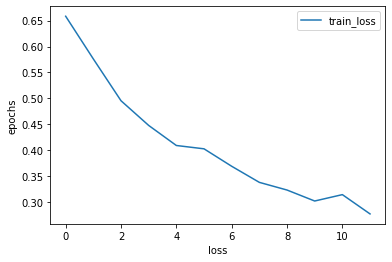

In [19]:
h=history.history
plt.plot(h["loss"], label="train_loss")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.legend()
plt.show()

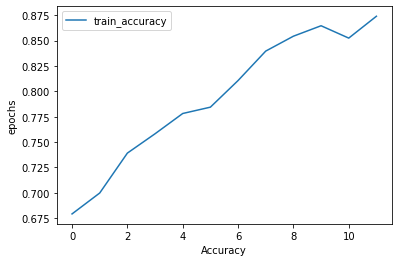

In [20]:
plt.plot(h["accuracy"], label="train_accuracy")
plt.xlabel("Accuracy")
plt.ylabel("epochs")
plt.legend()
plt.show()

In [21]:
import warnings
warnings.simplefilter("ignore")